<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/Precision_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df1 = Demographic event train

df2 = Demographic static train

df3 = Death train

In [111]:
# Read CSV files into dataframes
df1 = pd.read_csv('/content/demographics_event_train.csv')
df2 = pd.read_csv('/content/demographics_static_train.csv')
df3 = pd.read_csv('/content/death_train.csv')




In [112]:
df1.head()

,Unnamed: 0,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,1,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,2,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,4,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,5,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,6,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


In [113]:
df1.drop('Unnamed: 0',axis = 1,inplace = True)
df2.drop('Unnamed: 0',axis = 1,inplace = True)
df3.drop('Unnamed: 0',axis = 1,inplace = True)

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Internalpatientid  133252 non-null  int64  
 1   Age at update      133252 non-null  float64
 2   Event date         133252 non-null  object 
 3   Marital status     133252 non-null  object 
 4   Ruca category      133252 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [115]:
# split the DateTime column into separate Date and Time columns
df1[['Date', 'Time']] = df1['Event date'].str.split(' ', expand=True)

In [116]:
df1.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category,Date,Time
0,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban,2020-08-24,03:33:32.0
1,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural,2008-02-07,05:03:27.0
2,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban,2003-09-14,09:32:12.0
3,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban,2019-04-25,08:33:42.0
4,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban,2022-02-09,09:24:20.0


In [117]:
df1.drop('Event date',axis = 1,inplace = True)

In [118]:
df1.head()

,Internalpatientid,Age at update,Marital status,Ruca category,Date,Time
0,100028,78.990830,Married,Urban,2020-08-24,03:33:32.0
1,100032,91.357622,Married,Rural,2008-02-07,05:03:27.0
2,100046,72.961415,Married,Urban,2003-09-14,09:32:12.0
3,100071,75.221222,Widowed,Urban,2019-04-25,08:33:42.0
4,100091,80.955929,Never married,Urban,2022-02-09,09:24:20.0


In [119]:
df1.shape

(133252, 6)

In [120]:
df1.rename(columns={'Marital status': 'Marital_status', 'Age at update':'Age_at_update','Ruca category':'Ruca_category'},inplace = True)
df1.head()

,Internalpatientid,Age_at_update,Marital_status,Ruca_category,Date,Time
0,100028,78.990830,Married,Urban,2020-08-24,03:33:32.0
1,100032,91.357622,Married,Rural,2008-02-07,05:03:27.0
2,100046,72.961415,Married,Urban,2003-09-14,09:32:12.0
3,100071,75.221222,Widowed,Urban,2019-04-25,08:33:42.0
4,100091,80.955929,Never married,Urban,2022-02-09,09:24:20.0


In [121]:
df1.Marital_status.unique()

array(['Married', 'Widowed', 'Never married', 'Divorced',
       'Not specified (no value)', 'Separated', 'Unknown', 'Single'],
      dtype=object)

In [167]:
df1.Marital_status.value_counts()

Married                     73020
Divorced                    26856
Widowed                     19378
Never married                9352
Separated                    3708
Unknown                       534
Not specified (no value)      286
Single                        118
Name: Marital_status, dtype: int64

In [168]:
df1.Ruca_category.value_counts()

Urban            84092
Rural            46614
Highly rural      2034
Not specified      512
Name: Ruca_category, dtype: int64

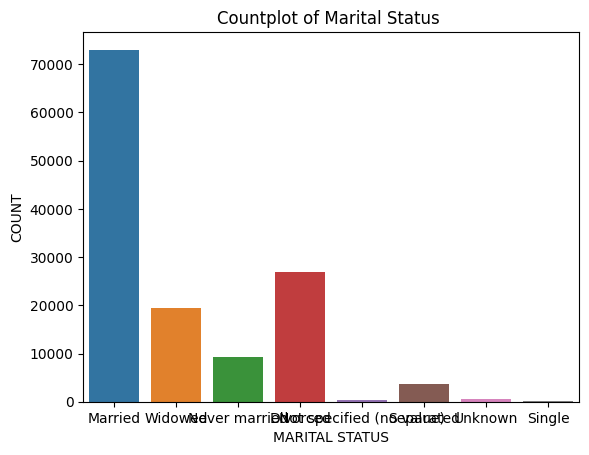

In [122]:
# Create the countplot
sns.countplot(x="Marital_status", data=df1)

# Add labels and title
plt.xlabel("MARITAL STATUS")
plt.ylabel("COUNT")
plt.title("Countplot of Marital Status ")
# Adjust the width between variables


# Show the plot
plt.show()

In [123]:
df1.Ruca_category.unique()

array(['Urban', 'Rural', 'Highly rural', 'Not specified'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


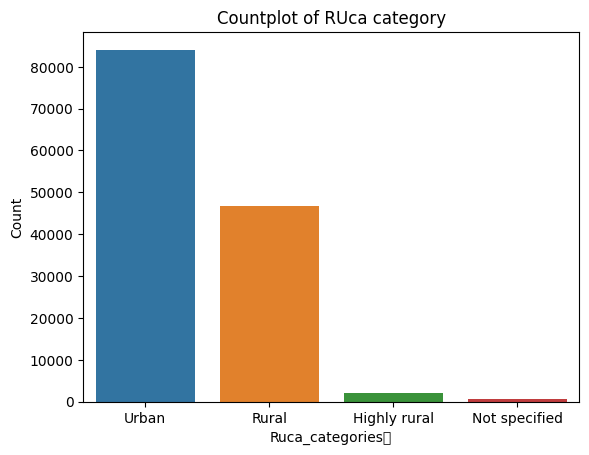

In [124]:
# Create the countplot
sns.countplot(x="Ruca_category", data=df1)

# Add labels and title
plt.xlabel("Ruca_categories	")
plt.ylabel("Count")
plt.title("Countplot of RUca category")

# Show the plot
plt.show()

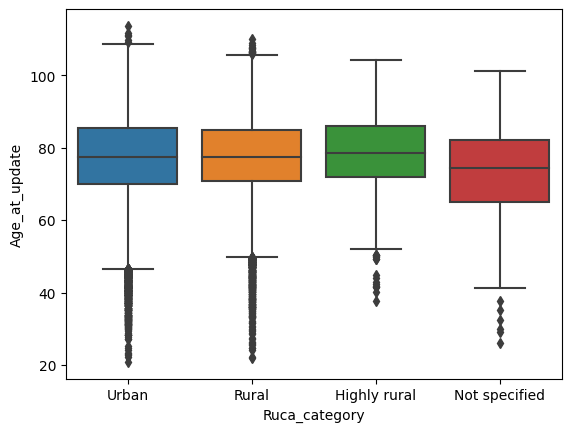

In [125]:
sns.boxplot(x='Ruca_category', y='Age_at_update', data=df1)
plt.show()

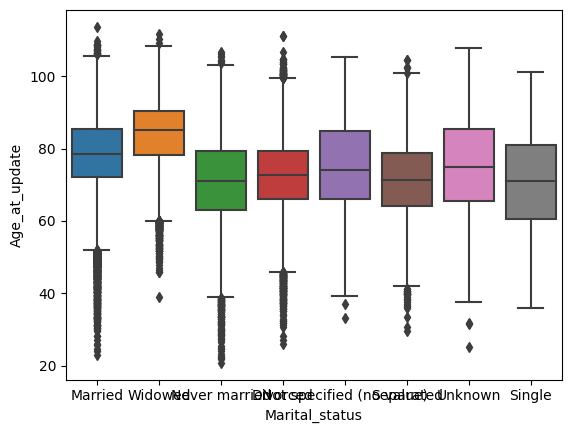

In [126]:
sns.boxplot(x='Marital_status', y='Age_at_update', data=df1)
plt.show()

In [127]:
df2.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [128]:
df2.shape

(133252, 5)

In [129]:
# rename two of the columns by using the 'rename' method
df2.rename(columns={'Veteran flag':'Veteran_flag'}, inplace=True)
df2.columns

Index(['Internalpatientid', 'Ethnicity', 'Gender', 'Races', 'Veteran_flag'], dtype='object')

In [169]:
df2.Veteran_flag.value_counts()

Yes    133093
No        159
Name: Veteran_flag, dtype: int64

In [170]:
df2.Races.value_counts()

White                                        85159
Not specified (no value)                     22501
Black or African American                    16699
Other                                         6513
White ; Other                                 1431
Asian                                          431
Black or African American ; Other              267
Black or African American ; White              198
Asian ; Other                                   17
White ; Asian                                   16
Black or African American ; White ; Other       11
White ; Asian ; Other                            5
Black or African American ; Asian                2
(Censored)                                       1
Black or African American ; White ; Asian        1
Name: Races, dtype: int64

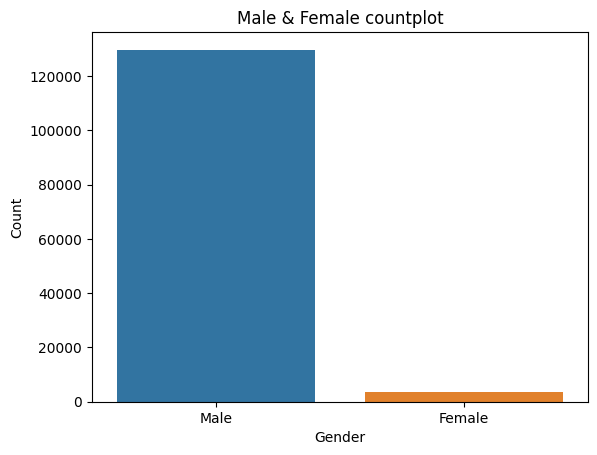

In [130]:
# Create the countplot
sns.countplot(x="Gender", data=df2)

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Male & Female countplot")

# Show the plot
plt.show()

In [131]:
df2.Races.unique()

array(['White', 'Not specified (no value)', 'Other',
       'Black or African American', 'Asian', 'White ; Other',
       'Black or African American ; White',
       'Black or African American ; Other', 'Asian ; Other',
       'Black or African American ; White ; Other', 'White ; Asian',
       'White ; Asian ; Other', 'Black or African American ; Asian',
       '(Censored)', 'Black or African American ; White ; Asian'],
      dtype=object)

In [132]:
df2.Races.nunique()

15

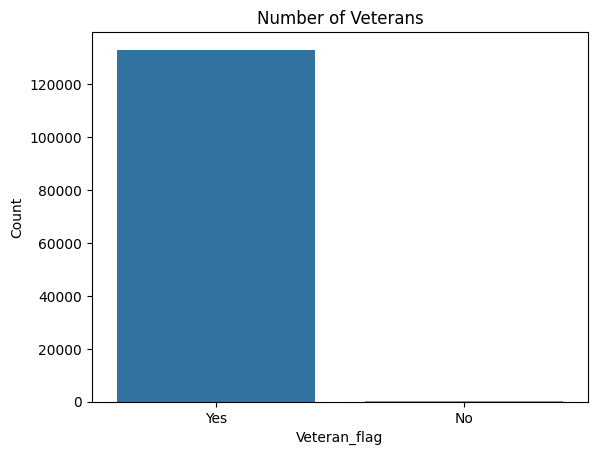

In [133]:
# Create the countplot
sns.countplot(x="Veteran_flag", data=df2)

# Add labels and title
plt.xlabel("Veteran_flag")
plt.ylabel("Count")
plt.title("Number of Veterans")

# Show the plot
plt.show()

In [134]:
df3.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0


In [135]:
# split the DateTime column into separate Date and Time columns
df3[['Death_Date', 'Death_Time']] = df3['Death date'].str.split(' ', expand=True)

In [136]:
df3.head()

,Internalpatientid,Age at death,Death date,Death_Date,Death_Time
0,100036,72.412770,2015-01-18 20:49:10.0,2015-01-18,20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0,2008-10-16,15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0,2019-01-26,11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0,2004-08-10,21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0,2007-06-11,00:17:06.0


In [137]:
df3.drop('Death date',axis = 1,inplace = True)

In [138]:
df3.head()

,Internalpatientid,Age at death,Death_Date,Death_Time
0,100036,72.412770,2015-01-18,20:49:10.0
1,100037,75.241135,2008-10-16,15:14:26.0
2,100045,85.399403,2019-01-26,11:33:52.0
3,100095,84.136551,2004-08-10,21:49:35.0
4,10013,68.372126,2007-06-11,00:17:06.0


In [139]:
df4 = pd.read_csv('/content/ed_visits_train.csv')

In [140]:
df4.head()

,Unnamed: 0,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,3,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,4,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,5,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,6,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [141]:
# split the DateTime column into separate Date and Time columns
df4[['Discharge_ed_Date', 'Discharge_ed_Time']] = df4['Discharge date ed'].str.split(' ', expand=True)

In [142]:
# split the DateTime column into separate Date and Time columns
df4[['ed_visit_start_Date', 'ed_visit_start_Time']] = df4['Ed visit start date'].str.split(' ', expand=True)

In [143]:
df4.head()

,Unnamed: 0,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,Discharge_ed_Date,Discharge_ed_Time,ed_visit_start_Date,ed_visit_start_Time
0,0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia,2021-08-26,04:24:27.0,2021-08-26,00:53:30.0
1,3,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia,2022-05-18,18:30:21.0,2022-05-18,11:21:28.0
2,4,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania,2017-06-26,23:33:50.0,2017-06-26,15:41:11.0
3,5,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York,2017-02-17,08:08:28.0,2017-02-17,06:42:34.0
4,6,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois,2018-09-30,04:28:57.0,2018-09-30,02:47:49.0


In [144]:
df4.drop('Unnamed: 0',axis = 1,inplace = True)



In [145]:
df4.drop('Ed visit start date',axis = 1,inplace = True)
df4.drop('Discharge date ed',axis = 1,inplace = True)

In [146]:
df4.head()

,Internalpatientid,Age at ed visit,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,Discharge_ed_Date,Discharge_ed_Time,ed_visit_start_Date,ed_visit_start_Time
0,101689,64.361251,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia,2021-08-26,04:24:27.0,2021-08-26,00:53:30.0
1,107210,71.317300,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia,2022-05-18,18:30:21.0,2022-05-18,11:21:28.0
2,107866,61.164579,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania,2017-06-26,23:33:50.0,2017-06-26,15:41:11.0
3,107906,66.101996,No,Dysuria,"Chronic kidney disease, unspecified",New York,2017-02-17,08:08:28.0,2017-02-17,06:42:34.0
4,108522,73.598130,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois,2018-09-30,04:28:57.0,2018-09-30,02:47:49.0


In [147]:
# rename two of the columns by using the 'rename' method
df4.rename(columns={'Age at ed visit':'Age_at_ed_visit','Died during ed visit':'Died_during_ed_visit',
                    'First listed diagnosis icd10 subcategory':'First_listed_diagnosis_icd10_subcategory',
                    'Second listed diagnosis icd10 subcategory':'Second_listed_diagnosis_icd10_subcategory'}, inplace=True)

In [148]:
df4.head()

,Internalpatientid,Age_at_ed_visit,Died_during_ed_visit,First_listed_diagnosis_icd10_subcategory,Second_listed_diagnosis_icd10_subcategory,State,Discharge_ed_Date,Discharge_ed_Time,ed_visit_start_Date,ed_visit_start_Time
0,101689,64.361251,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia,2021-08-26,04:24:27.0,2021-08-26,00:53:30.0
1,107210,71.317300,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia,2022-05-18,18:30:21.0,2022-05-18,11:21:28.0
2,107866,61.164579,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania,2017-06-26,23:33:50.0,2017-06-26,15:41:11.0
3,107906,66.101996,No,Dysuria,"Chronic kidney disease, unspecified",New York,2017-02-17,08:08:28.0,2017-02-17,06:42:34.0
4,108522,73.598130,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois,2018-09-30,04:28:57.0,2018-09-30,02:47:49.0


In [150]:
df4.First_listed_diagnosis_icd10_subcategory.nunique()

3645

In [152]:
df4.Second_listed_diagnosis_icd10_subcategory.nunique()

3060

In [153]:
df4.State.unique()

array(['Virginia', 'West Virginia', 'Pennsylvania', 'New York',
       'Illinois', 'Michigan', 'Missouri', 'Georgia', 'Arizona',
       'South Carolina', 'California', 'South Dakota', 'Indiana',
       'Louisiana', 'Kentucky', 'Alabama', 'Oregon', 'Nebraska', 'Idaho',
       'Delaware', 'Maryland', 'Arkansas', 'New Jersey', 'Tennessee',
       'Florida', 'Wisconsin', 'Connecticut', 'Colorado', 'Texas', 'Utah',
       'New Mexico', 'North Carolina', 'North Dakota', 'Oklahoma',
       'Maine', 'District of Columbia', 'Nevada', 'Ohio', 'Mississippi',
       'Montana', 'New Hampshire', 'Minnesota', 'Puerto Rico',
       'Rhode Island', 'Washington', 'Vermont', 'Massachusetts',
       'Wyoming'], dtype=object)

In [165]:
df4.State.value_counts()

California              44354
Florida                 38942
Texas                   32191
New York                29624
Missouri                26752
Tennessee               23794
Ohio                    20286
Pennsylvania            18317
North Carolina          17412
Arizona                 16875
Illinois                16077
Michigan                15923
Virginia                15456
Georgia                 14740
West Virginia           13858
Louisiana               12544
Wisconsin               11385
Kentucky                11171
South Carolina          11138
Indiana                 10385
Puerto Rico             10327
Arkansas                 9931
Oklahoma                 9865
Nevada                   9655
Minnesota                9329
Nebraska                 9028
Massachusetts            8486
Oregon                   8349
Alabama                  6178
Washington               6139
Mississippi              5934
Colorado                 5642
Utah                     5571
Maryland  

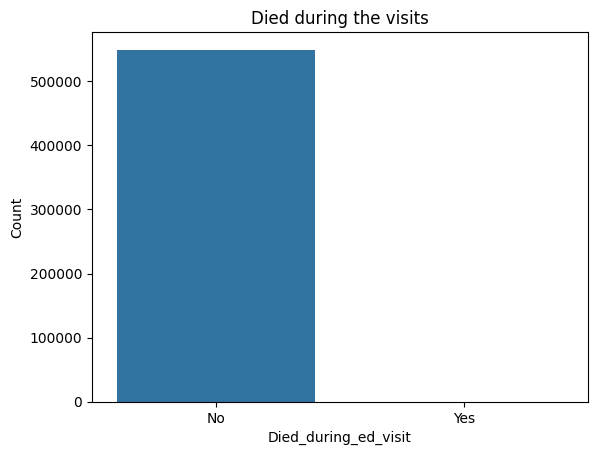

In [154]:
# Create the countplot
sns.countplot(x="Died_during_ed_visit", data=df4)

# Add labels and title
plt.xlabel("Died_during_ed_visit")
plt.ylabel("Count")
plt.title("Died during the visits")

# Show the plot
plt.show()

In [163]:
df4.Died_during_ed_visit.value_counts()

No     549746
Yes       111
Name: Died_during_ed_visit, dtype: int64